In [9]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [14]:
ttZ=pandas.read_csv('Files/class_mc_ttZ.csv')

In [15]:
data=pandas.read_csv('Files/class_data.csv')

In [131]:
#ttZ=ttZ.drop(columns=['tot_weight','new_w'])
#ttZ=ttZ.drop(columns=['t_w','t_w2','t_w3','t_w4','t_w5'])
ttZ=ttZ.drop(columns=['t_w1'])

In [132]:
ttZ.head()

,entry,is1L2Tau,is2L2Tau,is2LSS0Tau,pass_tight_2L,pass_SS_2L,is2LSS1Tau,is2LOS1Tau,is3L,is3L1Tau,...,lepSFObjTight,tauSFTight,tauSFLoose,tauFakeSF_weight,tauFakeSF_weight_SYST_JET_UP,tauFakeSF_weight_SYST_JET_DOWN,tauFakeSF_weight_SYST_LEP_UP,tauFakeSF_weight_SYST_LEP_DOWN,tauFakeSF_weight_STAT_UP,tauFakeSF_weight_STAT_DOWN
0,0,False,False,False,False,False,False,False,True,False,...,0.914884,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,False,False,False,False,False,False,False,True,False,...,0.892475,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,False,False,False,False,False,False,False,True,False,...,0.949663,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,False,False,False,False,False,False,False,True,False,...,0.946399,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,False,False,False,False,False,False,False,True,False,...,0.929530,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [133]:
def weight_df(df):    
    df['lumiscale'] = df.RunYear.apply(
               lambda x: (36074.6 if (x == 2015 or x == 2016) else 43813.7))
    weights = df.lumiscale*df.pileupEventWeight_090*df.scale_nom*df.JVT_EventWeight*df.MV2c10_70_EventWeight*df.lepSFObjTight*df.lepSFTrigTight*df.SherpaNJetWeight

    #weights=weights.where(df.RunYear == 2015) 
    #weights=weights.where((df.RunYear == 2016) & (df.RunYear == 2015),other=-2*weights) 
    return weights
#define weights:
#weights_list=['pileupEventWeight_090','scale_nom','JVT_EventWeight','MV2c10_70_EventWeight','lepSFObjTight','lepSFTrigTight','SherpaNJetWeight']
#w_tot=pileupEventWeight_090[f]*scale_nom[f]*JVT_EventWeight[f]  *MV2c10_70_EventWeight[f] *lepSFObjTight[f] * lepSFTrigTight[f]* SherpaNJetWeight[f]
 #* ( 36074.6*( RunYear[f]==2015 || RunYear[f]==2016 ) + 43813.7*( RunYear[f]==2017 ) );


In [134]:
w=weight_df(ttZ)

In [135]:
ttZ['t_w']=w

In [ ]:
ttZ[['RunYear','lumiscale','t_w']][:45]

In [73]:
w1[:10]

0    2.374362e-07
1    2.128844e-07
2    2.701567e-07
3   -2.590355e-07
4    2.191766e-07
5    3.163143e-07
6   -3.180213e-07
7    2.557469e-07
8   -3.535343e-07
9   -3.493510e-07
dtype: float64

In [74]:
w2[:10]

0   -2.374362e-07
1   -2.128844e-07
2   -2.701567e-07
3    2.590355e-07
4   -2.191766e-07
5   -3.163143e-07
6    3.180213e-07
7   -2.557469e-07
8    3.535343e-07
9    3.493510e-07
dtype: float64

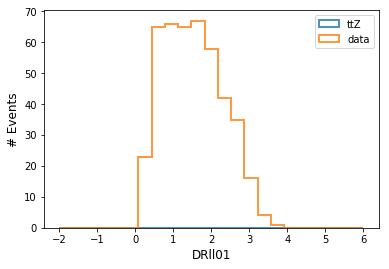

In [63]:
#hd_ttH.head()
var='DRll01'
binning = {"DRll01": np.linspace(-2, 6, 24),
               "max_eta": np.linspace(0, 2.5, 26)}
plt.hist(ttZ[var], binning[var], histtype='step',
         weights=ttZ.t_w,
         label=["ttZ"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist(data[var], binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()